In [1]:
import os
import scipy
import skimage
import sklearn

import numpy as np
import pandas as pd
import seaborn as sns
import rasterio as rio

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from skimage.feature import canny
from skimage.filters import threshold_multiotsu, threshold_otsu
from scipy import ndimage as ndi 

In [2]:
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = np.nanmin(array), np.nanmax(array)
    return ((array - array_min)/(array_max - array_min))

def read_bands_and_stack(filename):
    b1 = rio.open(filename).read(1)
    b2 = rio.open(filename).read(2)
    b3 = rio.open(filename).read(3)
    ba = rio.open(filename).read(4)
    
    return np.dstack([b1,b2,b3,ba])

sites = ['OsoFlacoRiver','OceanoDunes','OsoFlacoLake','KanabDam', 'KanabRiver']

# find files
s1_tifs = [os.path.join("../composites/sentinel",x) for x in os.listdir("../composites/sentinel") if x.endswith(".tif")]
naip_tifs = [os.path.join("../composites/naip",x) for x in os.listdir("../composites/naip") if x.endswith(".tif")]
drone_tifs = [os.path.join("../composites/wgs84/", x) for x in os.listdir("../composites/wgs84") if x.endswith(".tif") if "vis" in x] 

# read the images
site_ims= {}

for site in sites[:]:
    print("-----"*10)
    print(site)
    print("-----"*10)
    s1_im_fn = [x for x in s1_tifs if site in x][0]
    naip_im_fn = [x for x in naip_tifs if site in x][0]
    drone_im_fn = [x for x in drone_tifs if site in x][0]
    
    # Read files 
    s1 = read_bands_and_stack(s1_im_fn)
    naip = read_bands_and_stack(naip_im_fn)
    drone = mpimg.imread(drone_im_fn)
    
    im_dict = dict(zip(['drone','s1','naip'],[drone,s1,naip]))
    
    im_dict_masked = {}
    for k,v in im_dict.items():
        mask_arr = v[:,:,3].copy().astype(float)
        mask_arr[mask_arr==0] = np.nan
        bandarrs = [v[:,:,x] * mask_arr for x in range(0,3)]
        
        m_arr = np.dstack([(x) for x in bandarrs])
        im_dict_masked[k] = m_arr
        
    site_ims[site] = im_dict_masked

--------------------------------------------------
OsoFlacoRiver
--------------------------------------------------
--------------------------------------------------
OceanoDunes
--------------------------------------------------
--------------------------------------------------
OsoFlacoLake
--------------------------------------------------
--------------------------------------------------
KanabDam
--------------------------------------------------
--------------------------------------------------
KanabRiver
--------------------------------------------------


# SPECTRAL THRESHOLD CLASSIFICATION 

### Compute spectral indices: 

# VARI = $ \frac{ρ_{green} - ρ_{red}}{ρ_{green} + ρ_{red} + ρ_{blue}} $ 

NDVI = $ \frac{ρ_{NIR} - ρ_{red}}{ρ_{NIR} + ρ_{red}} $ 

Sentinel NIR Band == band 8 <br>
Sentinel red Band == band 4

In [3]:
def vari(image_3_channel):
    vari = (image_3_channel[:,:,1] - image_3_channel[:,:,0]) / (image_3_channel[:,:,1] + image_3_channel[:,:,0] + image_3_channel[:,:,2])
    return vari

def get_otsu_thresh(rs_im):
    image = rs_im.copy()
    thresh = threshold_otsu(image[~np.isnan(image)])
    binary = image > thresh
    
    return thresh, binary

def calc_pct_water(image):
    n_pixels_total = np.count_nonzero(~np.isnan(image))
    n_pix_non_water = np.nansum(image)
    pct_water = (n_pixels_total - n_pix_non_water) / n_pixels_total
    return pct_water

/var/folders/zd/rjxfh38941s3dn35jv9cdgmw0000gn/T/ipykernel_12303/1132529273.py:2: RuntimeWarning: invalid value encountered in divide
  vari = (image_3_channel[:,:,1] - image_3_channel[:,:,0]) / (image_3_channel[:,:,1] + image_3_channel[:,:,0] + image_3_channel[:,:,2])


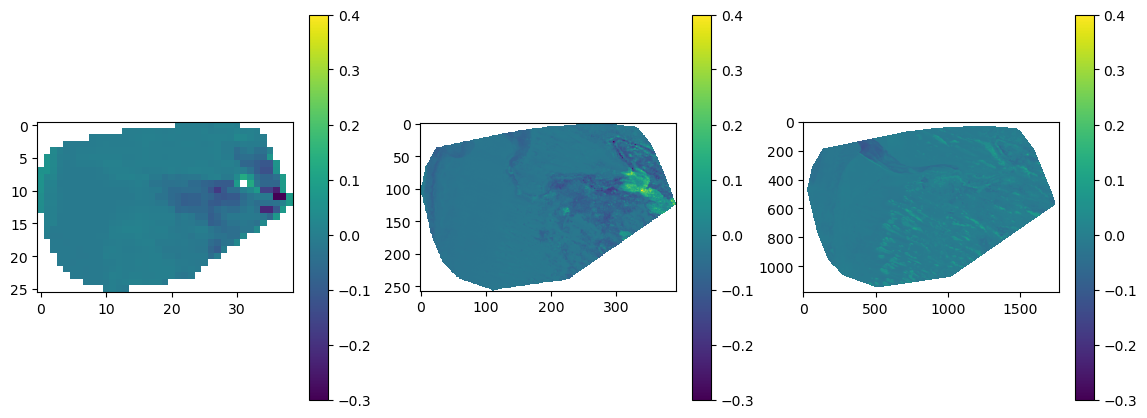

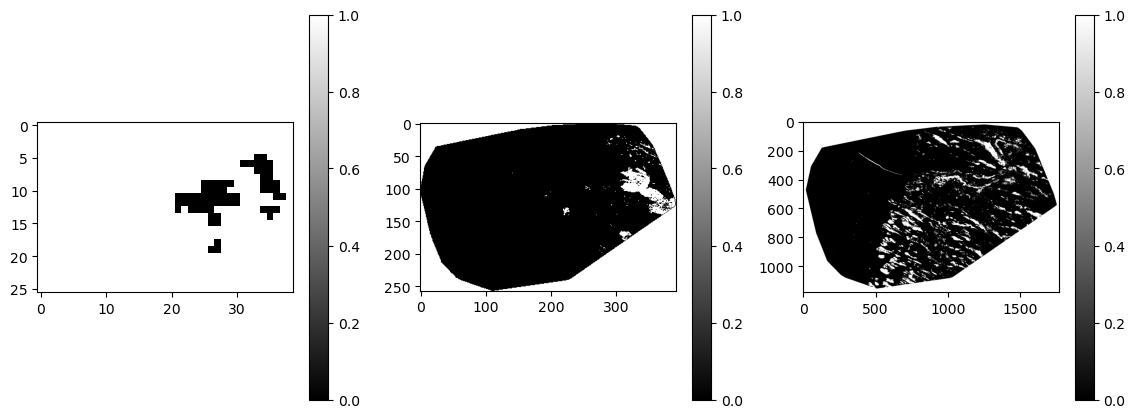

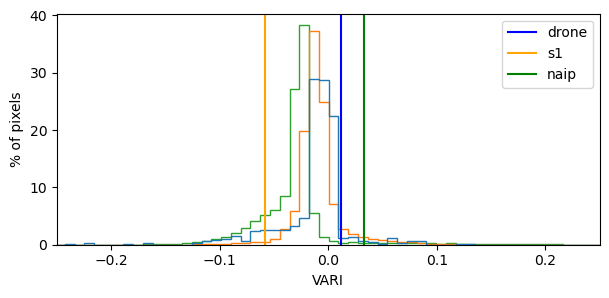

PERCENT WATER ------------------
S1 = 0.0641025641025641
NAIP = 0.7235468117207973
drone = 0.6409687933618649
--------------------------------


/var/folders/zd/rjxfh38941s3dn35jv9cdgmw0000gn/T/ipykernel_12303/1132529273.py:2: RuntimeWarning: invalid value encountered in divide
  vari = (image_3_channel[:,:,1] - image_3_channel[:,:,0]) / (image_3_channel[:,:,1] + image_3_channel[:,:,0] + image_3_channel[:,:,2])


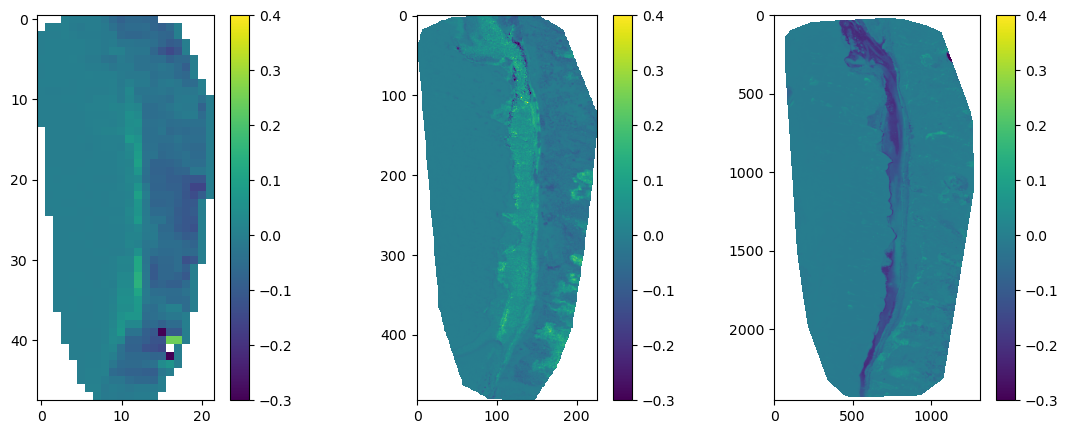

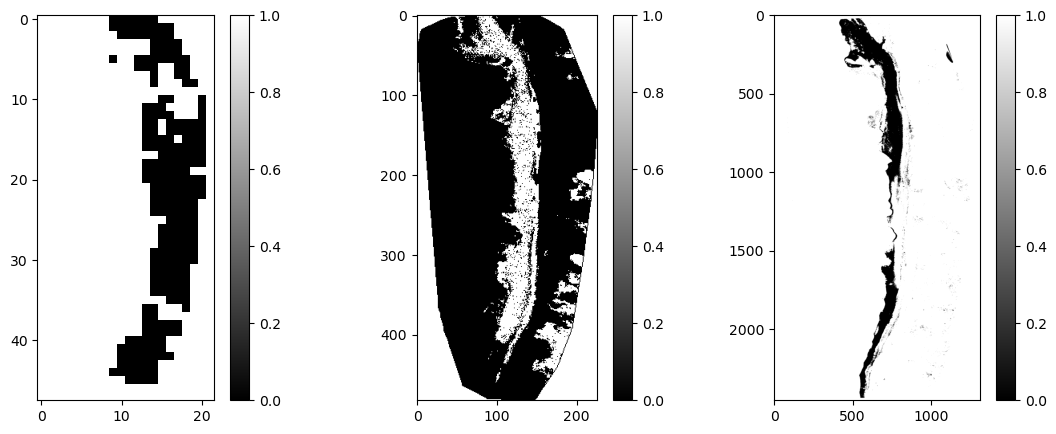

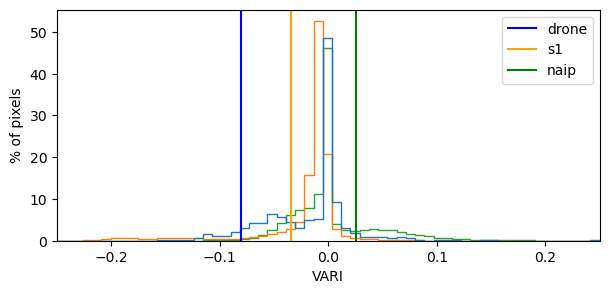

PERCENT WATER ------------------
S1 = 0.23200757575757575
NAIP = 0.6606478682277066
drone = 0.05695289603099697
--------------------------------


/var/folders/zd/rjxfh38941s3dn35jv9cdgmw0000gn/T/ipykernel_12303/1132529273.py:2: RuntimeWarning: invalid value encountered in divide
  vari = (image_3_channel[:,:,1] - image_3_channel[:,:,0]) / (image_3_channel[:,:,1] + image_3_channel[:,:,0] + image_3_channel[:,:,2])


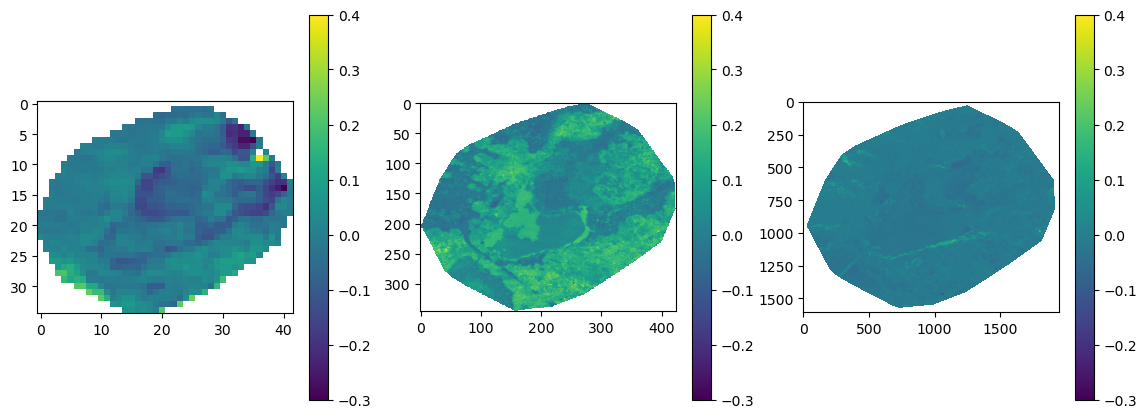

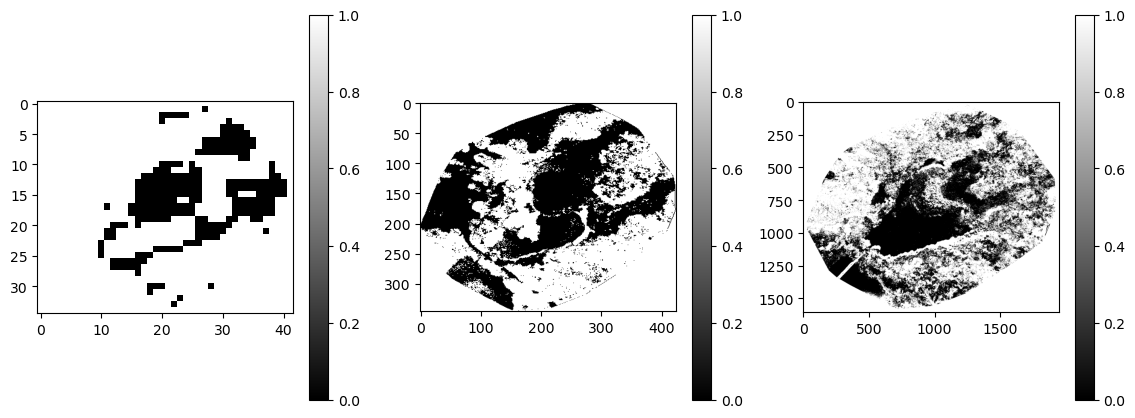

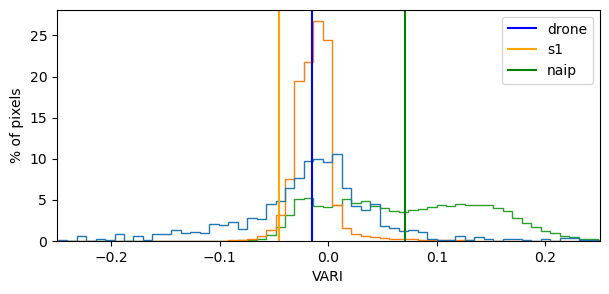

PERCENT WATER ------------------
S1 = 0.17142857142857143
NAIP = 0.35393036318028137
drone = 0.29804002837331245
--------------------------------


/var/folders/zd/rjxfh38941s3dn35jv9cdgmw0000gn/T/ipykernel_12303/1132529273.py:2: RuntimeWarning: invalid value encountered in divide
  vari = (image_3_channel[:,:,1] - image_3_channel[:,:,0]) / (image_3_channel[:,:,1] + image_3_channel[:,:,0] + image_3_channel[:,:,2])


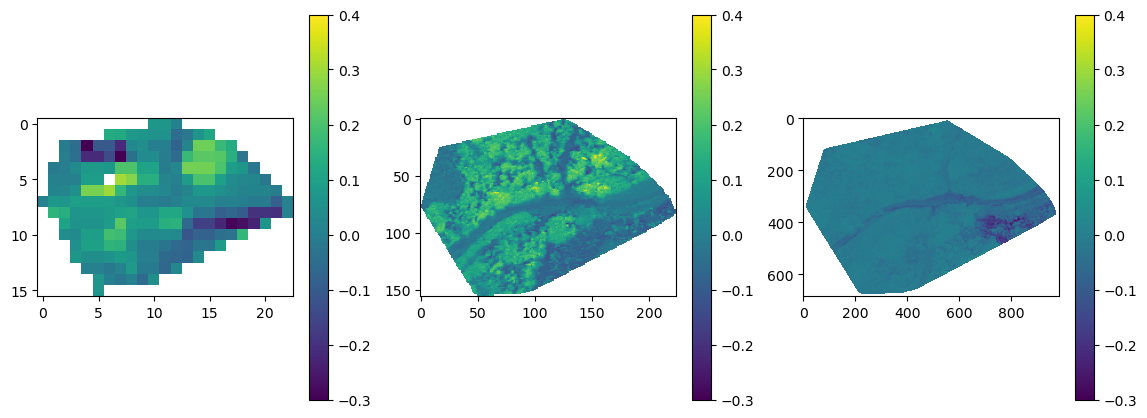

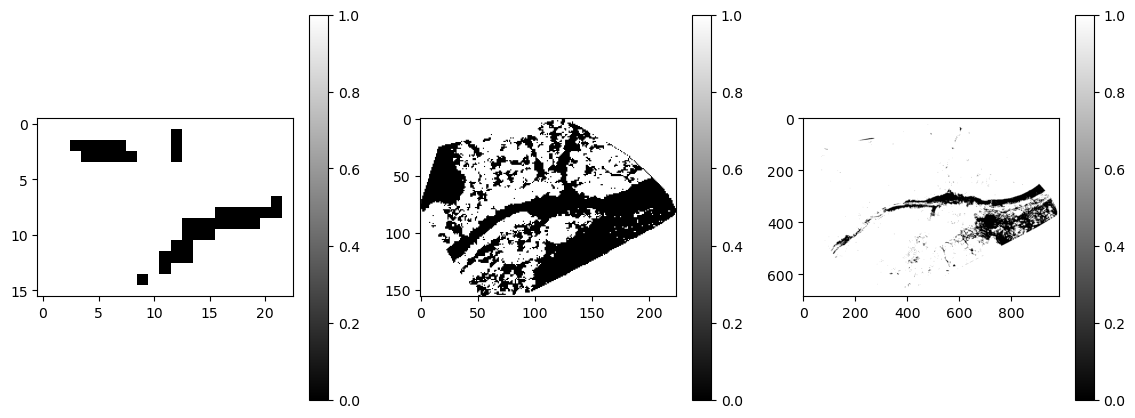

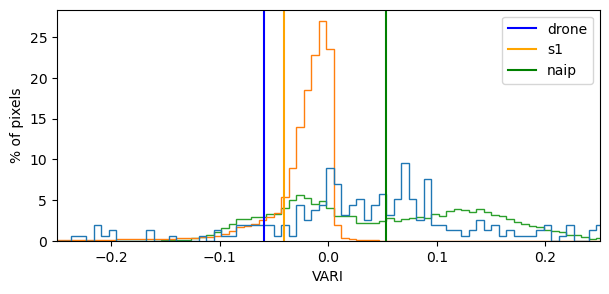

PERCENT WATER ------------------
S1 = 0.10054347826086957
NAIP = 0.34792811355311354
drone = 0.06382181292498795
--------------------------------


/var/folders/zd/rjxfh38941s3dn35jv9cdgmw0000gn/T/ipykernel_12303/1132529273.py:2: RuntimeWarning: invalid value encountered in divide
  vari = (image_3_channel[:,:,1] - image_3_channel[:,:,0]) / (image_3_channel[:,:,1] + image_3_channel[:,:,0] + image_3_channel[:,:,2])


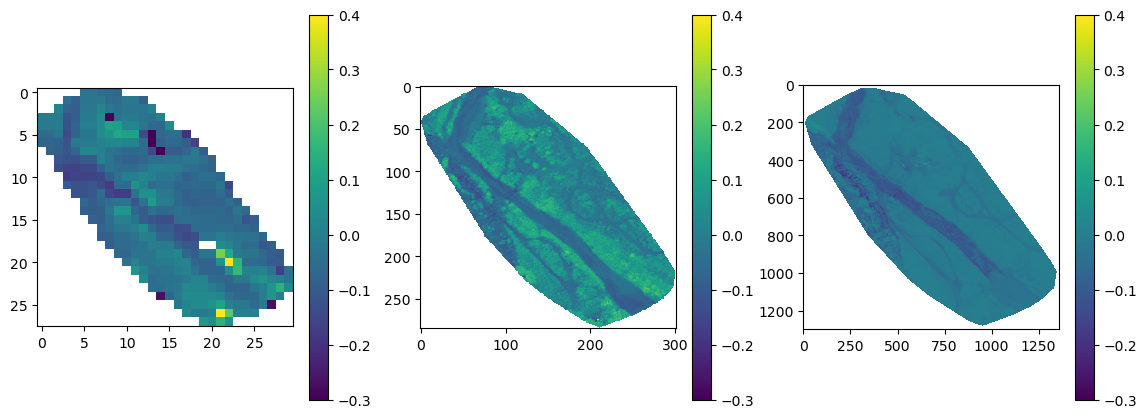

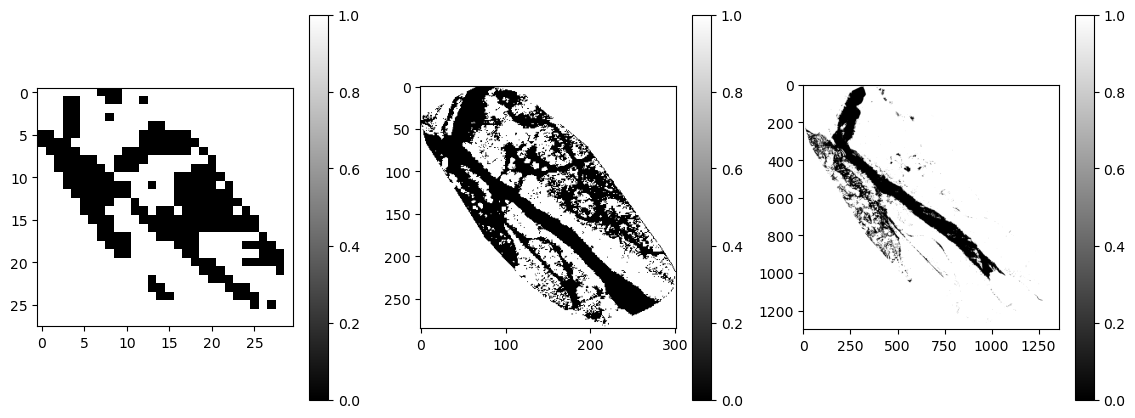

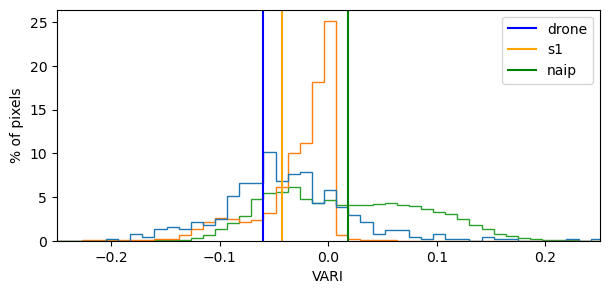

PERCENT WATER ------------------
S1 = 0.2714285714285714
NAIP = 0.28362767383575216
drone = 0.08546114165863614
--------------------------------


In [4]:
out_ims = {}

for k,v in site_ims.items():
    
    # Calc VARI, resample by a factor of 4, interpolate 
    drone_vari_raw = vari(v['drone'])
    t = skimage.measure.block_reduce(drone_vari_raw, block_size=(4, 4), func=np.mean)
    x = np.arange(0, t.shape[1])
    y = np.arange(0, t.shape[0])
    #mask invalid values
    array = np.ma.masked_invalid(t)
    xx, yy = np.meshgrid(x, y)
    #get only the valid values
    x1 = xx[~array.mask]
    y1 = yy[~array.mask]
    newarr = array[~array.mask]

    drone_vari = scipy.interpolate.griddata((x1, y1), newarr.ravel(),(xx, yy),method='cubic')
    
    # Calc VARI for other sensors 
    naip_vari = vari(v['naip'])
    s1_vari = vari(v['s1'])
    
    plt.figure(figsize=(14,5))
    plt.subplot(131)
    plt.imshow(s1_vari, vmin = -0.3, vmax = 0.4); plt.colorbar();
        
    plt.subplot(132)
    plt.imshow(naip_vari, vmin = -0.3, vmax = 0.4); plt.colorbar();
    
    plt.subplot(133)
    plt.imshow(drone_vari, vmin = -0.3, vmax = 0.4); plt.colorbar();
    
    # Get otsu's threshold 
    s1_thresh_val, s1_thresh_im = get_otsu_thresh(s1_vari)
    naip_thresh_val, naip_thresh_im = get_otsu_thresh(naip_vari)
    drone_thresh_val, drone_thresh_im = get_otsu_thresh(drone_vari)
    
    s1_thresh_im[np.isnan(s1_vari)] = np.nan
    naip_thresh_im[np.isnan(naip_vari)] = np.nan
    drone_thresh_im[np.isnan(drone_vari)] = np.nan

    plt.figure(figsize=(14,5))
    plt.subplot(131)
    plt.imshow(s1_thresh_im, cmap=plt.cm.gray); plt.colorbar();
        
    plt.subplot(132)
    plt.imshow(naip_thresh_im, cmap=plt.cm.gray); plt.colorbar();
    
    plt.subplot(133)
    plt.imshow(drone_thresh_im, cmap=plt.cm.gray); plt.colorbar();
    
    plt.show()
    
    plt.figure(figsize = (7,3))
    plt.hist([s1_vari.flatten(),drone_vari.flatten(),naip_vari.flatten()], bins = 200, density = True,histtype=u'step')
    plt.axvline(drone_thresh_val, color = 'blue', label = 'drone')
    plt.axvline(s1_thresh_val, color = 'orange', label = 's1')
    plt.axvline(naip_thresh_val, color = 'green', label = 'naip')
    plt.xlim([-0.25, 0.25])
    plt.xlabel("VARI")
    plt.ylabel("% of pixels")
    plt.legend()
    plt.show()
    
    print("PERCENT WATER ------------------")
    print("S1 = {}".format(calc_pct_water(s1_thresh_im)))
    print("NAIP = {}".format(calc_pct_water(naip_thresh_im)))
    print("drone = {}".format(calc_pct_water(drone_thresh_im)))
    print("--------------------------------")
    
    out_ims['drone'] = drone_vari
    out_ims['naip'] = naip_vari
    out_ims['s1'] = s1_vari

In [ ]:
for k,v in site_ims.items():
    
    # Drone 
    r = v['drone'][:,:,0]
    g = v['drone'][:,:,1]
    b = v['drone'][:,:,2]
    
    drone_thresh_val_r, drone_thresh_im_r = get_otsu_thresh(r)
    drone_thresh_val_g, drone_thresh_im_g = get_otsu_thresh(g)
    drone_thresh_val_b, drone_thresh_im_b = get_otsu_thresh(b)
    
    print("drone Threshes")
    print(drone_thresh_val_r, drone_thresh_val_g, drone_thresh_val_b)
    
    # Naip 
    r = v['naip'][:,:,0]
    g = v['naip'][:,:,1]
    b = v['naip'][:,:,2]
    
    naip_thresh_val_r, naip_thresh_im_r = get_otsu_thresh(r)
    naip_thresh_val_g, naip_thresh_im_g = get_otsu_thresh(g)
    naip_thresh_val_b, naip_thresh_im_b = get_otsu_thresh(b)
    
    print("naip Threshes")
    print(naip_thresh_val_r, naip_thresh_val_g, naip_thresh_val_b)
    
    # S1
    r = v['s1'][:,:,0]
    g = v['s1'][:,:,1]
    b = v['s1'][:,:,2]
    
    s1_thresh_val_r, s1_thresh_im_r = get_otsu_thresh(r)
    s1_thresh_val_g, s1_thresh_im_g = get_otsu_thresh(g)
    s1_thresh_val_b, s1_thresh_im_b = get_otsu_thresh(b)
    
    print("S1 Threshes")
    print(s1_thresh_val_r, s1_thresh_val_g, s1_thresh_val_b)
    
    class_naip = np.nansum([naip_thresh_im_r, naip_thresh_im_g, naip_thresh_im_b],axis = 0).astype(float)
    class_drone = np.nansum([drone_thresh_im_r, drone_thresh_im_g, drone_thresh_im_b],axis = 0).astype(float)
    class_s1 = np.nansum([s1_thresh_im_r, s1_thresh_im_g, s1_thresh_im_b],axis = 0).astype(float)
    
    plt.figure(figsize=(14,5))
    plt.subplot(131)
    plt.imshow(class_drone, cmap = 'Reds_r', alpha = 1)
    plt.colorbar()
    plt.subplot(132)
    plt.imshow(class_naip, cmap = 'Reds_r', alpha = 1)
    plt.colorbar()
    plt.subplot(133)
    plt.imshow(class_s1, cmap = 'Reds_r', alpha = 1)
    plt.colorbar()
    plt.show()

In [ ]:
for k,v, in out_ims.items():
    np.save("../data/{}.npy".format(k),v)